# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [6]:
import numpy as np

In [7]:
int(np.random.choice(range(1,7),1))

2

In [8]:
#conclusion
##on va convertir l'array en entier avec la fonction 'int()'

### Simulation du lancé de dé

In [9]:
def Roll():
    return int(np.random.choice(7))

In [10]:
for i in range(10) :
   print(Roll())

3
2
6
3
2
3
5
1
1
3


### Compléter le code et commenter

In [11]:
A=0 #la position
NA=0 # la valeur du dé (apres lancement)
N=20 #position de la cible
c=0 #le compteur
while (A<N) :
    NA=Roll()
    if NA==6 and A==0:
        A=1
        c+=1
        print(NA,A,c)
    elif A>0 and NA+A<N:
        A+=NA
        c+=1
        print(NA,A,c)
    elif NA+A==N:
        c+=1
        A+=NA
        print(NA,A,c)
        break
    else : 
        c+=1
        print(NA,A,c)
    

6 1 1
5 6 2
4 10 3
5 15 4
3 18 5
3 18 6
4 18 7
2 20 8


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [12]:
#c'est la simulation du jeu lido avec grille longueur= N 
##le principe du jeu : pouvoir determiner le plus petit nombre de coups possible pour atteindre la destination plus vite

In [13]:
def sim(N) : 
    A=0
    NA=10
    c=0
    while (A<N) :
        NA=Roll()
        if NA==6 and A==0:
            A=1
            c=c+1
        elif A>0 and NA+A<N:
            A=A+NA
            c=c+1
        elif NA+A==N:
            c=c+1
            A=A+NA
            break
        else :
            c=c+1
    return c

In [14]:
sim(20)

38

### Simulation de $10^5$  scénario 

In [15]:
for i in range(10):
    print(sim(20))

10
25
24
13
22
16
24
12
19
11


In [16]:
#conclusion: on joue 100,000(cible est N=20 cases) fois le lido en moyenne on a presque(dans ce cas) 18~19 coups pour arriver a la cible

In [35]:
L=[]
for i in range(100000):
    L.append(sim(20))
def moyenne(L):
    tot=0
    for u in L:
        tot=tot+u
    return tot/len(L)
moyenne(L)

18.90618

In [18]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

### on va faire 100,000 simulation du jeu 

In [19]:
ESP=Freq.sum()/10**5

In [20]:
x=list(range(10,20))

In [21]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [29]:
import matplotlib.pyplot as plt
xx=np.linspace(10,20,50)
yy=0.33709890909090906*xx+12.150573818181819

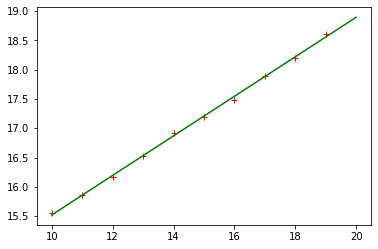

In [33]:
plt.plot(x,y,'r+')
plt.plot(xx,yy,'g')

# les points x,y seront noté(representé)sous la forme d'étoiles * (ou + )
# la droite avec la couleur precisé

# on va utilisé l'esperence suivant la valeur de N quelconque pour voir la forme du graph(la courbe) d'apres le nuage des points

 ## conclusion : l'esperence de E(x)=a*N+b cad la fonction d'une droite lineaire affine
 
 
$$\mathbb{E}(X_n)=0.337\times n + 12.150$$


In [24]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# a=la pente de la droite (slope)

In [25]:
slope

0.33709890909090906

# b=l'intersection de la droite avec l'origine (intercept)

In [26]:
intercept


12.150573818181819

## conclusion :  *il existe un droite qui parcours tous les points N du graph suivant les valeurs de N et E

##  *si on tire un theoreme(expression mathematique)de la simulation on peut abondonné les experiences et baser  les recherches en utilisons seulement la formule generale
              *